# Topic 3: Simple Word Embeddings - SOLUTIONS

Complete solutions for word embeddings exercises.

In [16]:
# Try to load spaCy for German word embeddings
try:
    import spacy
    nlp = spacy.load("de_core_news_sm")
    print("German spaCy model loaded successfully!")
    SPACY_AVAILABLE = True
except:
    print("Please install German spaCy model: python -m spacy download de_core_news_sm")
    nlp = None
    SPACY_AVAILABLE = False

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

German spaCy model loaded successfully!


## Solution 1: Basic Word Similarity

In [17]:
def find_similar_words(word, n_similar=5):
    """Find words similar to the given word."""
    
    if not SPACY_AVAILABLE:
        print("spaCy not available. Please install the German model.")
        return []
    
    # Get word vector
    word_doc = nlp(word)
    if not word_doc[0].has_vector:
        print(f"No vector available for word: {word}")
        return []
    
    # Test words to compare against
    test_words = [
        'katze', 'hund', 'auto', 'haus', 'baum', 'buch', 'computer', 'musik',
        'essen', 'trinken', 'laufen', 'gehen', 'schön', 'gut', 'schlecht',
        'groß', 'klein', 'rot', 'blau', 'grün', 'mann', 'frau', 'kind',
        'liebe', 'hass', 'freude', 'trauer', 'arbeiten', 'spielen', 'lernen'
    ]
    
    similarities = []
    
    for test_word in test_words:
        if test_word != word.lower():
            test_doc = nlp(test_word)
            if test_doc[0].has_vector:
                similarity = word_doc[0].similarity(test_doc[0])
                similarities.append((test_word, similarity))
    
    # Sort by similarity and return top n
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:n_similar]

# Test with different words
test_words = ['hund', 'auto', 'musik', 'gut']

for word in test_words:
    print(f"\nWords similar to '{word}':")
    similar = find_similar_words(word)
    for sim_word, score in similar:
        print(f"  {sim_word}: {score:.3f}")


Words similar to 'hund':
  hass: 0.518
  computer: 0.477
  mann: 0.471
  frau: 0.432
  trauer: 0.413

Words similar to 'auto':


C:\Users\Felix Neubürger\AppData\Local\Temp\ipykernel_19908\3870771578.py:28: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = word_doc[0].similarity(test_doc[0])


  gehen: 0.509
  gut: 0.458
  spielen: 0.418
  schön: 0.412
  blau: 0.405

Words similar to 'musik':
  frau: 0.673
  trauer: 0.639
  freude: 0.566
  liebe: 0.536
  mann: 0.515

Words similar to 'gut':
  schlecht: 0.757
  schön: 0.756
  groß: 0.643
  rot: 0.598
  blau: 0.578


## Solution 2: Word Analogies

## Solution 2: Custom Word2Vec Training

In [ ]:
def train_custom_word2vec_solution():
    """Complete solution for training custom German Word2Vec model."""
    
    try:
        from gensim.models import Word2Vec
        from gensim.utils import simple_preprocess
    except ImportError:
        print("Please install gensim: pip install gensim")
        return None
    
    # Extended German text corpus for training
    german_texts = [
        "Berlin ist die Hauptstadt von Deutschland und eine wunderschöne Stadt mit vielen Museen.",
        "München ist bekannt für das Oktoberfest und liegt in Bayern im Süden Deutschlands.",
        "Hamburg hat einen großen Hafen und ist eine wichtige Hafenstadt an der Nordsee.",
        "Köln ist eine alte Stadt mit einem berühmten Dom und vielen Kunstgalerien.",
        "Frankfurt ist das Finanzzentrum Deutschlands mit vielen Banken und Wolkenkratzern.",
        "Stuttgart ist die Heimat von Mercedes-Benz und Porsche, zwei berühmte Automarken.",
        "Dresden ist eine kulturell reiche Stadt in Sachsen mit barocker Architektur.",
        "Leipzig ist eine Universitätsstadt mit langer Geschichte und vielen Studenten.",
        "Nürnberg ist bekannt für Lebkuchen und die schönen Christkindlmärkte im Winter.",
        "Bremen ist eine Hansestadt im Norden Deutschlands mit maritimer Tradition.",
        "Die deutsche Sprache hat viele zusammengesetzte Wörter und komplexe Grammatik.",
        "Deutsche Kultur umfasst Musik, Literatur, Philosophie und wissenschaftliche Errungenschaften.",
        "Das deutsche Bildungssystem legt großen Wert auf Ausbildung und Universitäten.",
        "Deutsche Küche ist vielfältig mit regionalen Spezialitäten wie Sauerbraten und Spätzle.",
        "Der deutsche Fußball ist weltberühmt mit Vereinen wie Bayern München und Borussia Dortmund."
    ]
    
    # Preprocess texts for Word2Vec training
    processed_sentences = []
    for text in german_texts:
        # Simple preprocessing with gensim
        words = simple_preprocess(text, deacc=True, min_len=2, max_len=15)
        processed_sentences.append(words)
    
    print("🚀 Training Custom German Word2Vec Model...")
    print(f"Training corpus: {len(processed_sentences)} sentences")
    
    # Train Word2Vec model with optimized parameters
    model = Word2Vec(
        sentences=processed_sentences,
        vector_size=100,        # Dimension of word vectors
        window=5,               # Context window size
        min_count=1,            # Minimum word frequency
        workers=4,              # Number of threads
        sg=1,                   # Skip-gram model (1) vs CBOW (0)
        epochs=100,             # Number of training epochs
        alpha=0.025,            # Initial learning rate
        min_alpha=0.0001        # Final learning rate
    )
    
    print(f"✅ Model trained successfully!")
    print(f"Vocabulary size: {len(model.wv.key_to_index)}")
    print(f"Vector dimensions: {model.wv.vector_size}")
    
    return model

def demonstrate_word2vec_capabilities(model):
    """Demonstrate various Word2Vec capabilities."""
    
    if model is None:
        print("No model available for demonstration.")
        return
    
    print("\n🔍 Word2Vec Model Capabilities:")
    print("=" * 50)
    
    # 1. Word similarity
    print("\n1. Word Similarity Analysis:")
    test_words = ['berlin', 'münchen', 'deutschland', 'kultur']
    
    for word in test_words:
        if word in model.wv.key_to_index:
            try:
                similar_words = model.wv.most_similar(word, topn=3)
                print(f"\nWords similar to '{word}':")
                for sim_word, similarity in similar_words:
                    print(f"  {sim_word}: {similarity:.3f}")
            except KeyError:
                print(f"'{word}' not in vocabulary")
    
    # 2. Word analogies
    print("\n2. Word Analogy Tasks:")
    analogies = [
        ('berlin', 'deutschland', 'paris'),     # Berlin:Germany :: Paris:?
        ('münchen', 'bayern', 'hamburg'),       # Munich:Bavaria :: Hamburg:?
        ('auto', 'fahren', 'flugzeug')         # Car:drive :: Airplane:?
    ]
    
    for word1, word2, word3 in analogies:
        try:
            if all(w in model.wv.key_to_index for w in [word1, word2, word3]):
                result = model.wv.most_similar(positive=[word2, word3], negative=[word1], topn=1)
                answer, confidence = result[0]
                print(f"{word1} : {word2} :: {word3} : {answer} ({confidence:.3f})")
            else:
                print(f"Some words not in vocabulary for analogy: {word1}, {word2}, {word3}")
        except Exception as e:
            print(f"Analogy failed: {e}")
    
    # 3. Vector operations
    print("\n3. Vector Operations:")
    if 'deutschland' in model.wv.key_to_index and 'berlin' in model.wv.key_to_index:
        try:
            # Get word vectors
            germany_vec = model.wv['deutschland']
            berlin_vec = model.wv['berlin']
            
            # Calculate cosine similarity
            from sklearn.metrics.pairwise import cosine_similarity
            similarity = cosine_similarity([germany_vec], [berlin_vec])[0][0]
            print(f"Cosine similarity between 'deutschland' and 'berlin': {similarity:.3f}")
        except Exception as e:
            print(f"Vector operation failed: {e}")

# Train and demonstrate Word2Vec model
custom_w2v_model = train_custom_word2vec_solution()
if custom_w2v_model:
    demonstrate_word2vec_capabilities(custom_w2v_model)

In [18]:
def solve_analogy(word1, word2, word3, candidate_words):
    """Solve word analogies: word1 is to word2 as word3 is to ?"""
    
    if not SPACY_AVAILABLE:
        print("spaCy not available.")
        return None
    
    # Get vectors
    doc1 = nlp(word1)
    doc2 = nlp(word2)
    doc3 = nlp(word3)
    
    if not all([doc1[0].has_vector, doc2[0].has_vector, doc3[0].has_vector]):
        print("Some words don't have vectors.")
        return None
    
    # Calculate target vector: word2 - word1 + word3
    target_vector = doc2[0].vector - doc1[0].vector + doc3[0].vector
    
    best_word = None
    best_similarity = -1
    
    # Find best matching word from candidates
    for candidate in candidate_words:
        if candidate.lower() not in [word1.lower(), word2.lower(), word3.lower()]:
            candidate_doc = nlp(candidate)
            if candidate_doc[0].has_vector:
                similarity = cosine_similarity(
                    [target_vector], [candidate_doc[0].vector]
                )[0][0]
                
                if similarity > best_similarity:
                    best_similarity = similarity
                    best_word = candidate
    
    return best_word, best_similarity

# Test analogies
analogies = [
    ('mann', 'frau', 'könig', ['königin', 'prinz', 'kaiser', 'dame', 'herr']),
    ('groß', 'klein', 'hoch', ['niedrig', 'tief', 'kurz', 'lang', 'breit']),
    ('berlin', 'deutschland', 'paris', ['frankreich', 'italien', 'europa', 'stadt', 'land'])
]

for word1, word2, word3, candidates in analogies:
    result = solve_analogy(word1, word2, word3, candidates)
    if result:
        best_word, similarity = result
        print(f"{word1} : {word2} :: {word3} : {best_word} (similarity: {similarity:.3f})")
    else:
        print(f"Could not solve: {word1} : {word2} :: {word3} : ?")

mann : frau :: könig : königin (similarity: 0.453)
groß : klein :: hoch : niedrig (similarity: 0.597)
berlin : deutschland :: paris : frankreich (similarity: 0.495)


## Solution 3: Word Clustering

In [19]:
def cluster_words(words, n_clusters=3):
    """Cluster words based on their embeddings."""
    
    if not SPACY_AVAILABLE:
        print("spaCy not available.")
        return {}
    
    from sklearn.cluster import KMeans
    
    # Get word vectors
    vectors = []
    valid_words = []
    
    for word in words:
        doc = nlp(word)
        if doc[0].has_vector:
            vectors.append(doc[0].vector)
            valid_words.append(word)
    
    if len(vectors) < n_clusters:
        print("Not enough valid word vectors for clustering.")
        return {}
    
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(vectors)
    
    # Group words by cluster
    result = {}
    for i in range(n_clusters):
        result[f'Cluster {i+1}'] = []
    
    for word, cluster in zip(valid_words, clusters):
        result[f'Cluster {cluster+1}'].append(word)
    
    return result

# Test clustering with different categories of words
mixed_words = [
    # Animals
    'hund', 'katze', 'vogel', 'fisch',
    # Food
    'brot', 'käse', 'apfel', 'wasser',
    # Colors
    'rot', 'blau', 'grün', 'gelb',
    # Actions
    'laufen', 'springen', 'essen', 'trinken'
]

clusters = cluster_words(mixed_words, n_clusters=4)

print("Word Clustering Results:")
for cluster_name, words in clusters.items():
    print(f"{cluster_name}: {', '.join(words)}")

Word Clustering Results:
Cluster 1: hund, katze, käse, apfel
Cluster 2: laufen, springen, essen, trinken
Cluster 3: vogel
Cluster 4: fisch, brot, wasser, rot, blau, grün, gelb


## Solution 4: Embedding Visualization


Visualizing Animals:


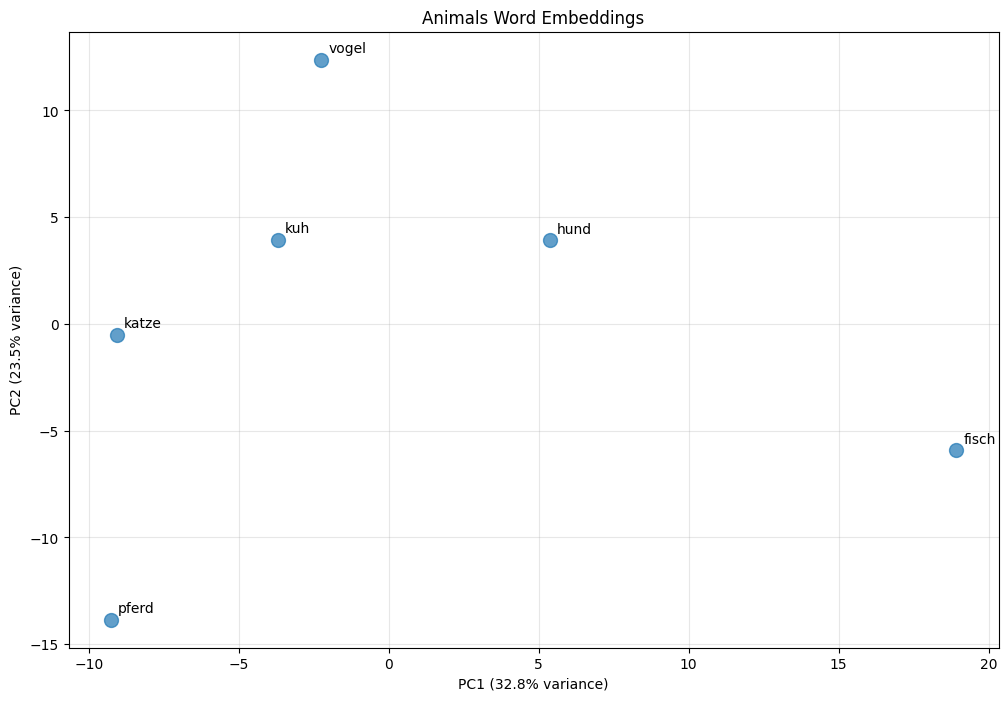


Visualizing Food:


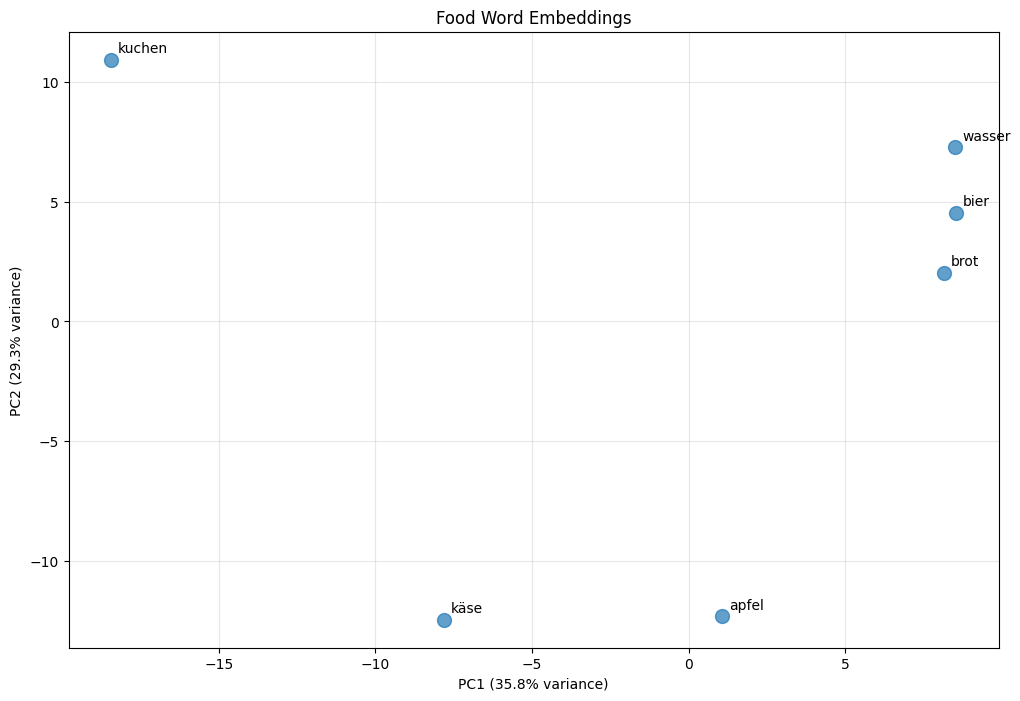


Visualizing Colors:


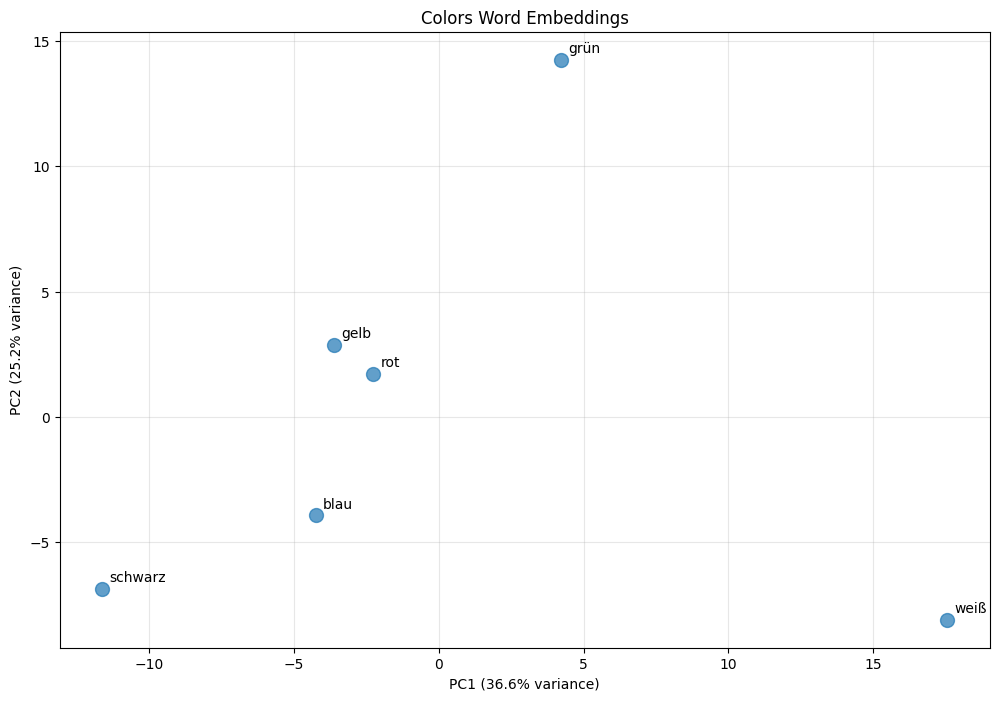


Visualizing Mixed:


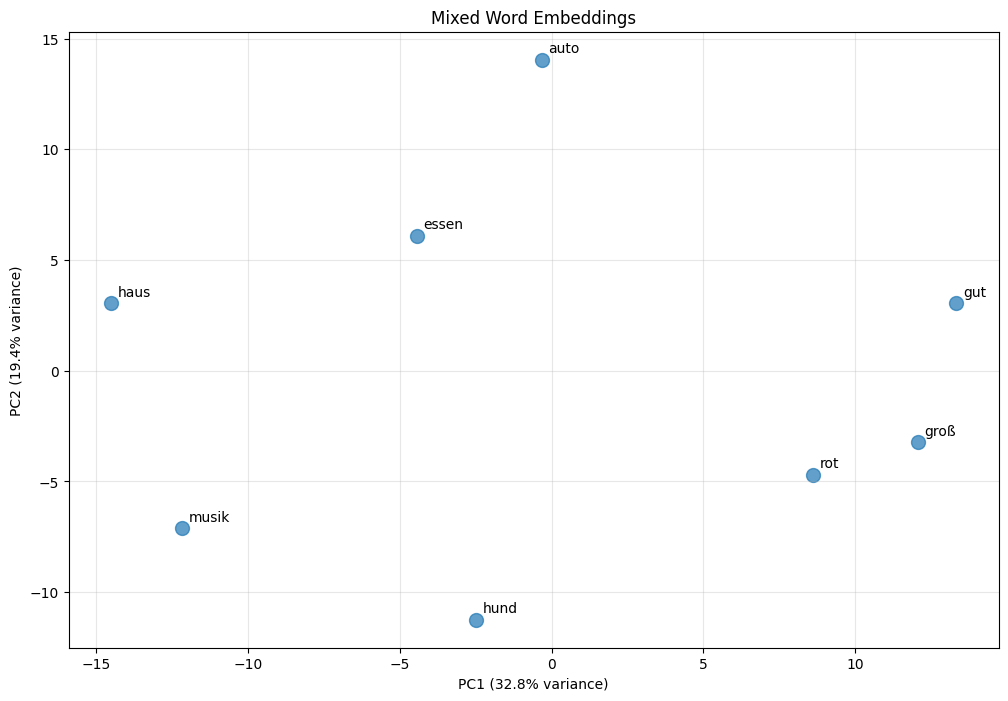

In [20]:
def visualize_word_embeddings(words, title="Word Embeddings Visualization"):
    """Visualize word embeddings in 2D using PCA."""
    
    if not SPACY_AVAILABLE:
        print("spaCy not available.")
        return
    
    # Get word vectors
    vectors = []
    valid_words = []
    
    for word in words:
        doc = nlp(word)
        if doc[0].has_vector:
            vectors.append(doc[0].vector)
            valid_words.append(word)
    
    if len(vectors) < 2:
        print("Need at least 2 valid word vectors for visualization.")
        return
    
    # Reduce dimensions to 2D using PCA
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)
    
    # Create plot
    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.7, s=100)
    
    # Add word labels
    for i, word in enumerate(valid_words):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), 
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=10, ha='left')
    
    plt.title(title)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return vectors_2d, valid_words

# Visualize different categories
categories = {
    'Animals': ['hund', 'katze', 'vogel', 'fisch', 'pferd', 'kuh'],
    'Food': ['brot', 'käse', 'apfel', 'wasser', 'bier', 'kuchen'],
    'Colors': ['rot', 'blau', 'grün', 'gelb', 'schwarz', 'weiß'],
    'Mixed': ['hund', 'rot', 'essen', 'haus', 'auto', 'musik', 'gut', 'groß']
}

for category, words in categories.items():
    print(f"\nVisualizing {category}:")
    visualize_word_embeddings(words, f"{category} Word Embeddings")

## Solution 5: Semantic Search

In [21]:
def semantic_search(query, documents, top_k=3):
    """Find most similar documents to a query using word embeddings."""
    
    if not SPACY_AVAILABLE:
        print("spaCy not available.")
        return []
    
    # Process query
    query_doc = nlp(query)
    
    if not query_doc.has_vector:
        print("Query has no vector representation.")
        return []
    
    # Calculate similarities
    similarities = []
    
    for i, doc_text in enumerate(documents):
        doc = nlp(doc_text)
        if doc.has_vector:
            similarity = query_doc.similarity(doc)
            similarities.append((i, doc_text, similarity))
    
    # Sort by similarity and return top k
    similarities.sort(key=lambda x: x[2], reverse=True)
    return similarities[:top_k]

# Test semantic search
documents = [
    "Der Hund spielt im Garten mit einem Ball.",
    "Die Katze schläft auf dem warmen Sofa.",
    "Im Restaurant gibt es heute frisches Brot und Käse.",
    "Das Auto fährt schnell auf der Autobahn.",
    "Die Musik im Konzert war sehr schön und laut.",
    "Der Computer ist kaputt und muss repariert werden.",
    "Kinder spielen gerne mit Spielzeug im Park.",
    "Das Essen im neuen Restaurant schmeckt ausgezeichnet."
]

queries = [
    "Tiere zu Hause",
    "Essen und Trinken",
    "Fahrzeuge und Transport",
    "Kinder und Spiel"
]

for query in queries:
    print(f"\nQuery: '{query}'")
    print("Most similar documents:")
    
    results = semantic_search(query, documents, top_k=3)
    
    for rank, (doc_id, doc_text, similarity) in enumerate(results, 1):
        print(f"  {rank}. (Score: {similarity:.3f}) {doc_text}")


Query: 'Tiere zu Hause'
Most similar documents:
  1. (Score: 0.537) Kinder spielen gerne mit Spielzeug im Park.
  2. (Score: 0.450) Im Restaurant gibt es heute frisches Brot und Käse.
  3. (Score: 0.414) Das Essen im neuen Restaurant schmeckt ausgezeichnet.

Query: 'Essen und Trinken'
Most similar documents:
  1. (Score: 0.507) Im Restaurant gibt es heute frisches Brot und Käse.
  2. (Score: 0.352) Kinder spielen gerne mit Spielzeug im Park.
  3. (Score: 0.340) Das Essen im neuen Restaurant schmeckt ausgezeichnet.

Query: 'Fahrzeuge und Transport'
Most similar documents:
  1. (Score: 0.465) Im Restaurant gibt es heute frisches Brot und Käse.
  2. (Score: 0.418) Kinder spielen gerne mit Spielzeug im Park.
  3. (Score: 0.310) Die Musik im Konzert war sehr schön und laut.

Query: 'Kinder und Spiel'
Most similar documents:


C:\Users\Felix Neubürger\AppData\Local\Temp\ipykernel_19908\4101876557.py:21: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = query_doc.similarity(doc)


  1. (Score: 0.518) Im Restaurant gibt es heute frisches Brot und Käse.
  2. (Score: 0.439) Kinder spielen gerne mit Spielzeug im Park.
  3. (Score: 0.307) Die Musik im Konzert war sehr schön und laut.


## Solution 6: Custom Word Similarity Calculator

Word Pair Similarities:
hund - katze: 0.305
auto - fahrrad: 0.157
essen - trinken: 0.637
groß - klein: 0.732
rot - blau: 0.566

Creating similarity matrix for: ['hund', 'katze', 'auto', 'haus', 'baum', 'wasser']


C:\Users\Felix Neubürger\AppData\Local\Temp\ipykernel_19908\3464678985.py:30: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return doc1[0].similarity(doc2[0])


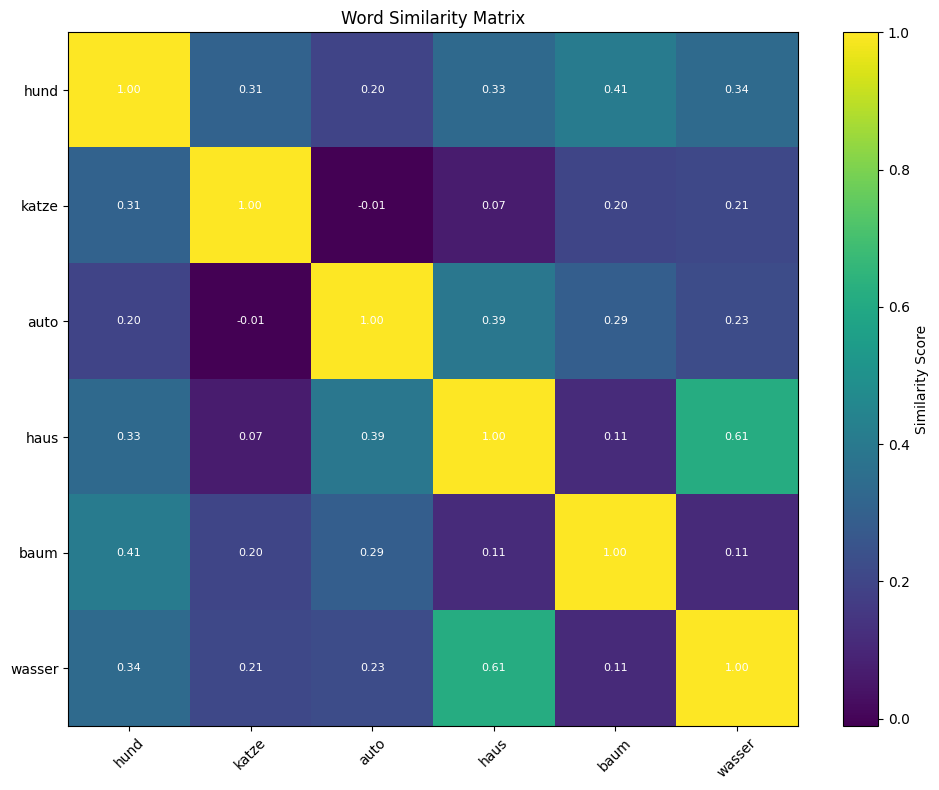

array([[ 1.        ,  0.30536491,  0.1960579 ,  0.33324042,  0.4077996 ,
         0.33735111],
       [ 0.30536491,  1.        , -0.01086804,  0.06589532,  0.19869362,
         0.20692995],
       [ 0.1960579 , -0.01086804,  1.        ,  0.39171633,  0.29277223,
         0.22546329],
       [ 0.33324042,  0.06589532,  0.39171633,  1.        ,  0.11371513,
         0.61355549],
       [ 0.4077996 ,  0.19869362,  0.29277223,  0.11371513,  1.        ,
         0.1078376 ],
       [ 0.33735111,  0.20692995,  0.22546329,  0.61355549,  0.1078376 ,
         1.        ]])

In [22]:
class GermanWordSimilarity:
    """Custom class for German word similarity calculations."""
    
    def __init__(self):
        if SPACY_AVAILABLE:
            self.nlp = nlp
        else:
            self.nlp = None
            print("Warning: spaCy not available. Limited functionality.")
    
    def get_word_vector(self, word):
        """Get vector representation of a word."""
        if not self.nlp:
            return None
        
        doc = self.nlp(word)
        if doc[0].has_vector:
            return doc[0].vector
        return None
    
    def similarity(self, word1, word2):
        """Calculate similarity between two words."""
        if not self.nlp:
            return 0.0
        
        doc1 = self.nlp(word1)
        doc2 = self.nlp(word2)
        
        if doc1[0].has_vector and doc2[0].has_vector:
            return doc1[0].similarity(doc2[0])
        return 0.0
    
    def find_most_similar(self, target_word, word_list, n=5):
        """Find most similar words from a given list."""
        similarities = []
        
        for word in word_list:
            if word.lower() != target_word.lower():
                sim = self.similarity(target_word, word)
                similarities.append((word, sim))
        
        similarities.sort(key=lambda x: x[1], reverse=True)
        return similarities[:n]
    
    def create_similarity_matrix(self, words):
        """Create similarity matrix for a list of words."""
        n = len(words)
        matrix = np.zeros((n, n))
        
        for i, word1 in enumerate(words):
            for j, word2 in enumerate(words):
                if i == j:
                    matrix[i, j] = 1.0
                else:
                    matrix[i, j] = self.similarity(word1, word2)
        
        return matrix, words
    
    def visualize_similarity_matrix(self, words):
        """Visualize similarity matrix as heatmap."""
        matrix, word_labels = self.create_similarity_matrix(words)
        
        plt.figure(figsize=(10, 8))
        plt.imshow(matrix, cmap='viridis', aspect='auto')
        plt.colorbar(label='Similarity Score')
        plt.xticks(range(len(word_labels)), word_labels, rotation=45)
        plt.yticks(range(len(word_labels)), word_labels)
        plt.title('Word Similarity Matrix')
        
        # Add similarity scores to cells
        for i in range(len(word_labels)):
            for j in range(len(word_labels)):
                plt.text(j, i, f'{matrix[i, j]:.2f}', 
                        ha='center', va='center', color='white', fontsize=8)
        
        plt.tight_layout()
        plt.show()
        
        return matrix

# Test the custom similarity calculator
similarity_calc = GermanWordSimilarity()

# Test basic similarity
word_pairs = [
    ('hund', 'katze'),
    ('auto', 'fahrrad'),
    ('essen', 'trinken'),
    ('groß', 'klein'),
    ('rot', 'blau')
]

print("Word Pair Similarities:")
for word1, word2 in word_pairs:
    sim = similarity_calc.similarity(word1, word2)
    print(f"{word1} - {word2}: {sim:.3f}")

# Test similarity matrix visualization
test_words = ['hund', 'katze', 'auto', 'haus', 'baum', 'wasser']
print(f"\nCreating similarity matrix for: {test_words}")
similarity_calc.visualize_similarity_matrix(test_words)